# Breast Cancer Prediction System
## By Hassan Fakih Osman
### My Aim is to be able to predict whether the patient is either Malginant or Benign using classification algorithms.
#### Attribute Information: (11 features)

#### 1. Sample code number: id number
#### 2. Clump Thickness: 1 - 10
#### 3. Uniformity of Cell Size: 1 - 10
#### 4. Uniformity of Cell Shape: 1 - 10
#### 5. Marginal Adhesion: 1 - 10
#### 6. Single Epithelial Cell Size: 1 - 10
#### 7. Bare Nuclei: 1 - 10
#### 8. Bland Chromatin: 1 - 10
#### 9. Normal Nucleoli: 1 - 10
#### 10. Mitoses: 1 - 10
#### 11. Class: (2 for benign, 4 for malignant)

#### Dataset Title: Breast Cancer Wisconsin (original) Dataset
#### Dataset Source: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29
#### The dataset is made up of 699 records

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Dataset:

In [2]:
data = pd.read_csv('Breast_Cancer_Wisconsin.csv')
data

,id_number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [3]:
data.describe()

,id_number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Seems like its better if we use Stratified KFold due to possible unequal class distributions when we split our data for the models:

In [4]:
data['Class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

### Bare Nuclei carries some null values:
#### As seen here 683 records in the 'Bare Nuclei' column however the dataset is made up of 699 records, so 16 null values present

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


<Axes: >

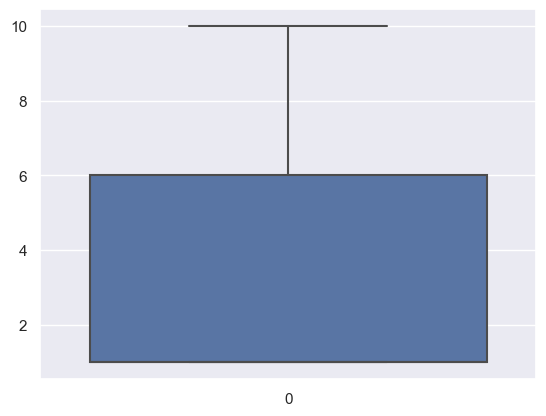

In [6]:
sns.boxplot(data['Bare Nuclei'])

### Changing the null values with bare nuclei's mode (most repeated value):
#### Since we have a very small discrete number of possibilities in Bare Nuclei column, using mode as a replacement seemed most suitable

In [7]:
data['Bare Nuclei'].fillna(data['Bare Nuclei'].mode()[0], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


### Dropping the 'id_number' column since it brings us with no relavant information about the patient:

In [8]:
data.drop('id_number', inplace = True, axis = 1)

### Plottings: 

### Heatmap (Correlation):
#### All features seem to have an increasing linear relationship with class

<Axes: >

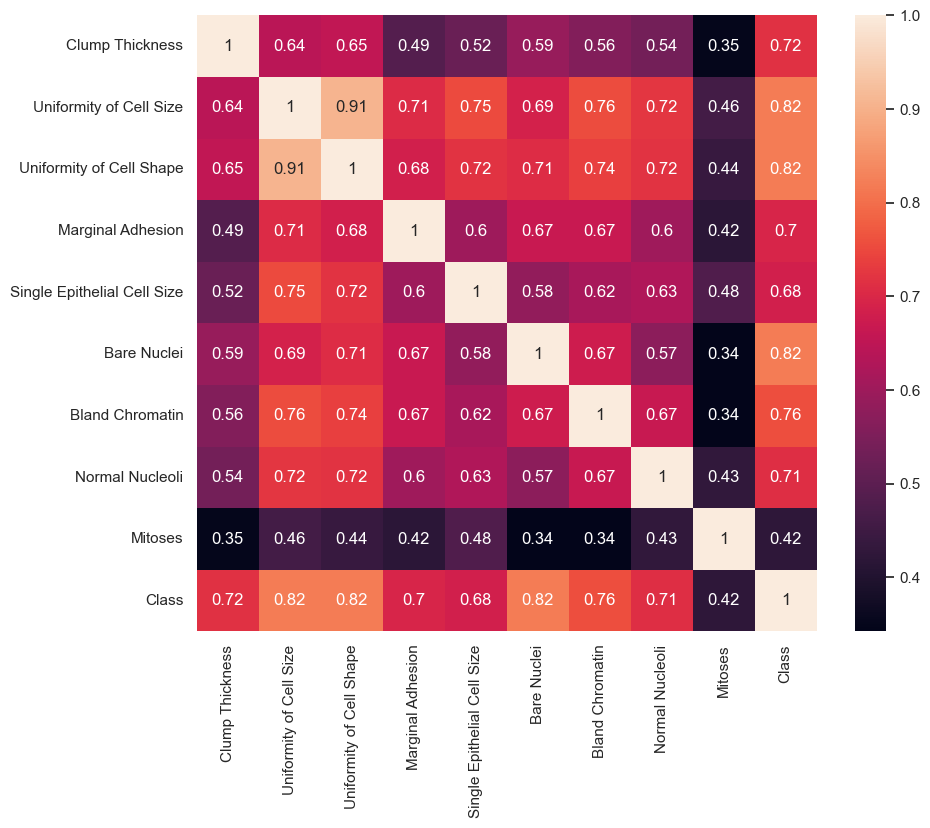

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

### ! You may read more about the following plottings in the report and why they result in an increase on malignancy as they increase from 1 to 10:

### However, class column increases as the features increase from 1 to 10 in all of the following plottings

### Bare Nuclei x Class line plot

<Axes: xlabel='Bare Nuclei', ylabel='Class'>

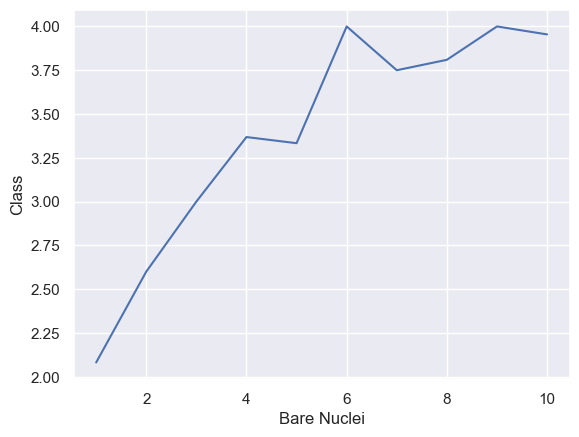

In [10]:
sns.lineplot(x='Bare Nuclei', y ='Class', data = data, errorbar = None)

### Uniformity of Cell Size x Class Line plot:

<Axes: xlabel='Uniformity of Cell Size', ylabel='Class'>

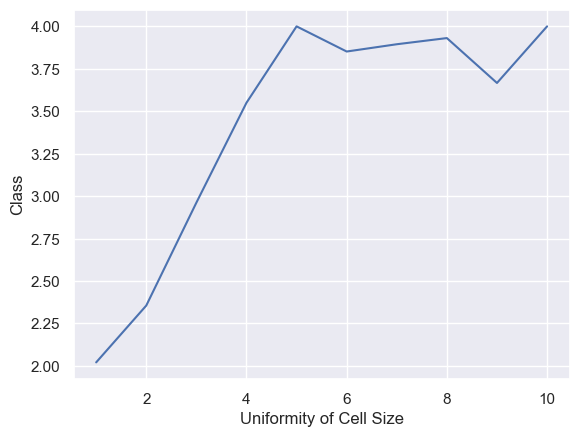

In [11]:
sns.lineplot(x='Uniformity of Cell Size', y='Class', data = data,errorbar = None)

### Uniformity of Cell Shape x Class Line plot:

<Axes: xlabel='Uniformity of Cell Shape', ylabel='Class'>

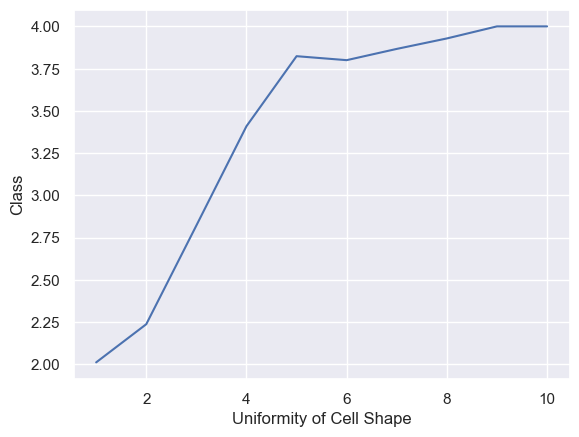

In [12]:
sns.lineplot(x='Uniformity of Cell Shape', y='Class', data = data, errorbar = None)

### Marginal Adhesion x Class Line plot:

<Axes: xlabel='Marginal Adhesion', ylabel='Class'>

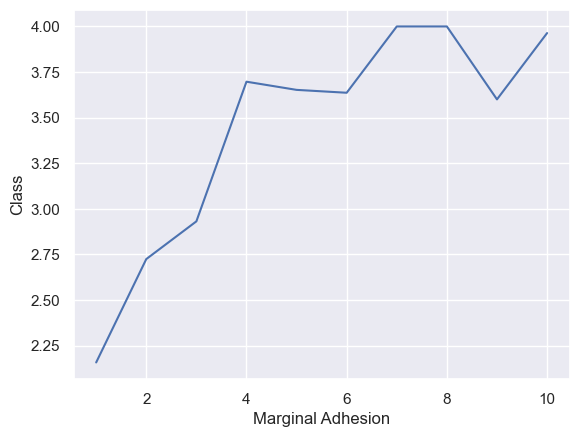

In [13]:
sns.lineplot(x='Marginal Adhesion', y='Class', data=data, errorbar = None)

### Mitoses x Class Bar plot

<Axes: xlabel='Mitoses', ylabel='Class'>

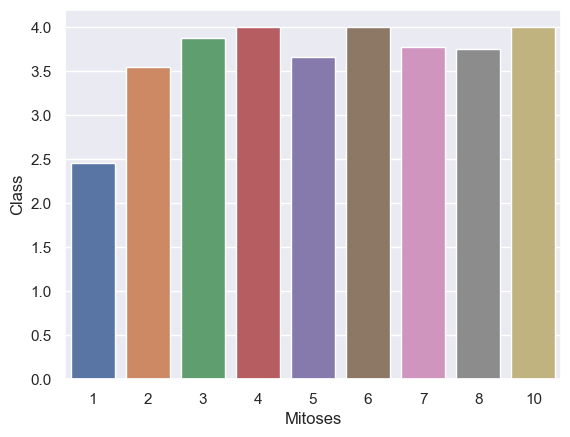

In [14]:
sns.barplot(x='Mitoses', y='Class', data=data, errorbar = None)

### Single Epithelial Cell Size x Class Bar plot

<Axes: xlabel='Single Epithelial Cell Size', ylabel='Class'>

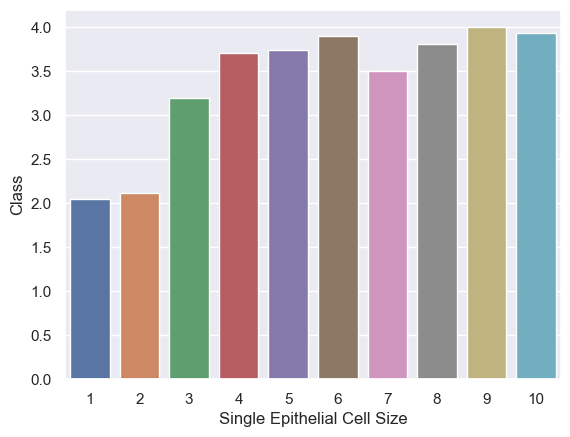

In [15]:
sns.barplot(x='Single Epithelial Cell Size', y='Class', data=data, errorbar = None)

### Bland Chromatin x Class Bar Plot:

<Axes: xlabel='Bland Chromatin', ylabel='Class'>

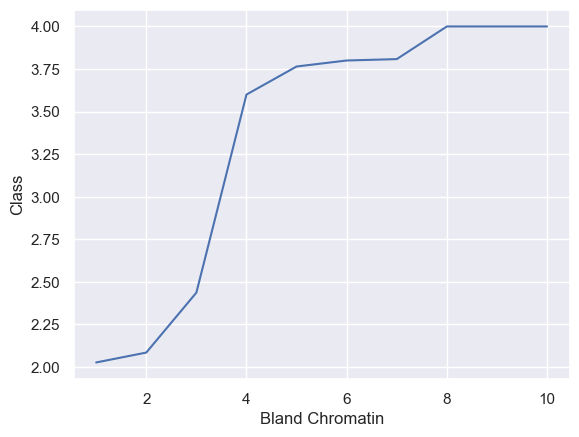

In [16]:
sns.lineplot(x='Bland Chromatin', y='Class', data=data, errorbar = None)

### Normal Nucleoli x Class Bar plot:

<Axes: xlabel='Normal Nucleoli', ylabel='Class'>

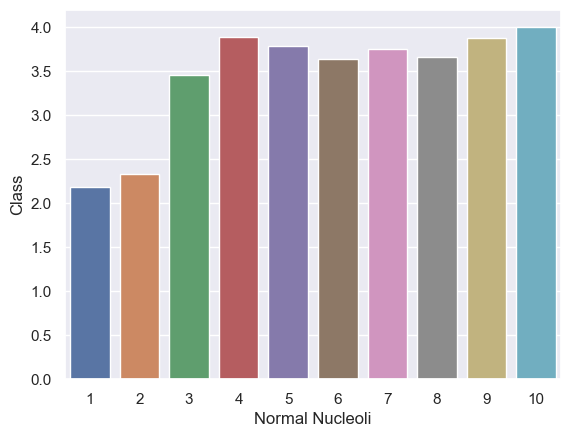

In [17]:
sns.barplot(x='Normal Nucleoli', y='Class', data=data, errorbar = None)

### Clump Thickness x Class Line plot:

<Axes: xlabel='Clump Thickness', ylabel='Class'>

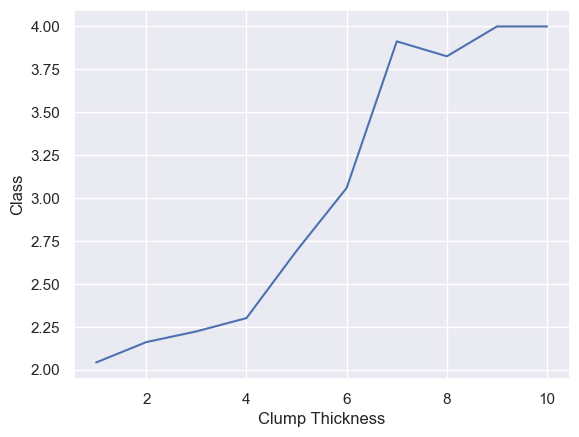

In [18]:
sns.lineplot(x='Clump Thickness', y='Class', data=data, errorbar = None)

## Model Training:

In [19]:
features = ['Clump Thickness', 'Uniformity of Cell Size' ,'Uniformity of Cell Shape' ,'Marginal Adhesion' ,'Single Epithelial Cell Size' ,'Bare Nuclei' ,'Bland Chromatin' ,'Normal Nucleoli' ,'Mitoses']
labels = 'Class'

X = data[features].values
y = data[labels].values

### Feature Importance

733.207             1408.5272             1419.3055             657.7937             608.7196             1419.6655             933.2873             717.628             152.0402             

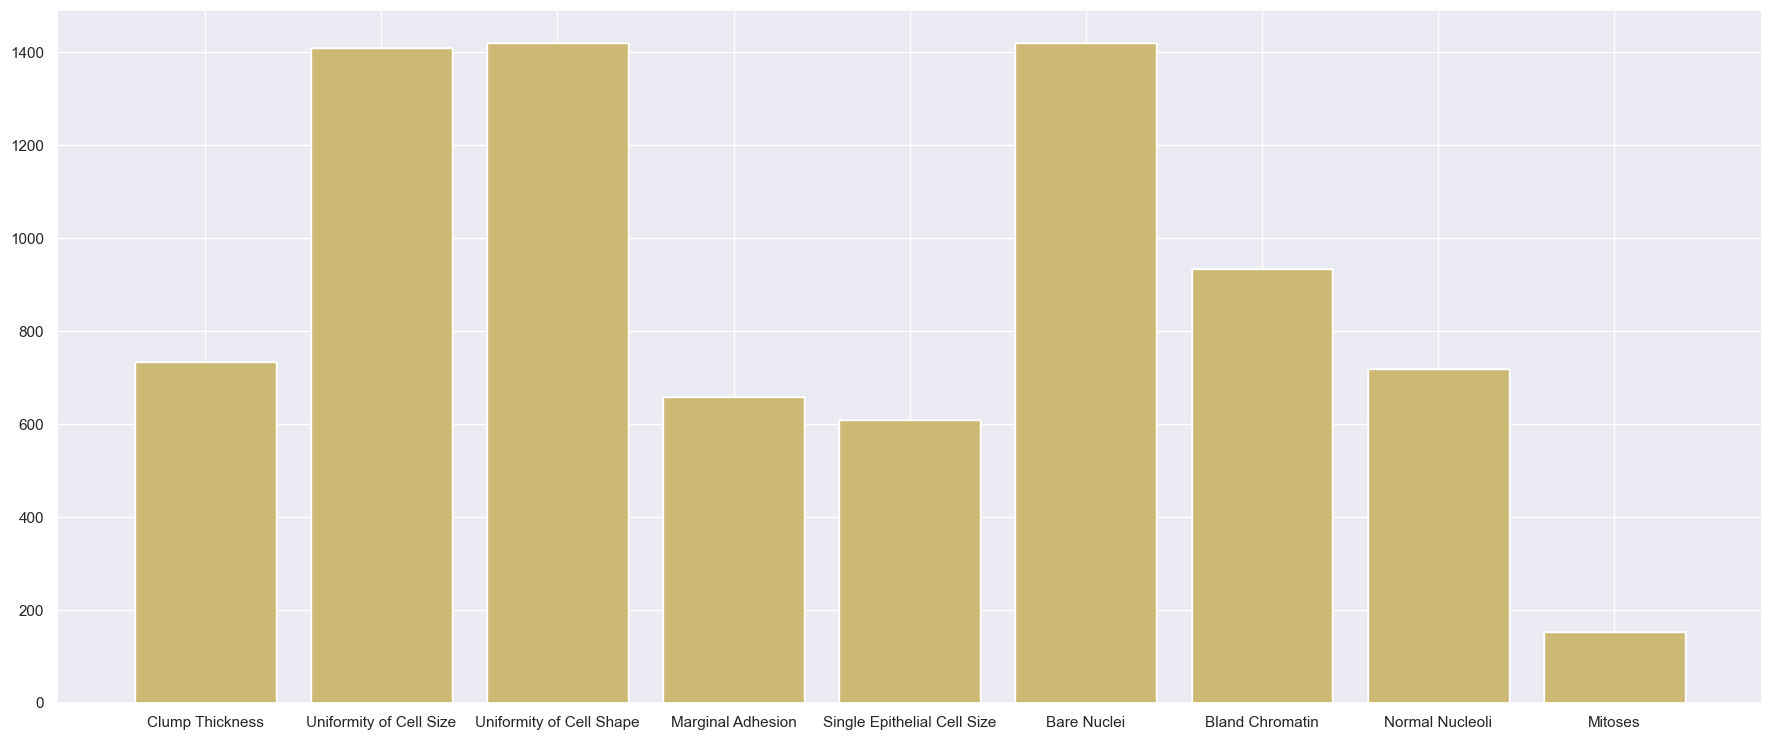

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

model = SelectKBest(f_classif, k='all')
model.fit(X,y)
plt.figure(figsize=(22,9))
for i in range(len(model.scores_)):
    print(round(model.scores_[i],4), end = " "*13)
    plt.bar(features, model.scores_)
    #[i for i in range(len(model.scores_))]

### PCA (testing)

In [21]:
# from sklearn.decomposition import PCA
# pcaX = PCA(n_components=2).fit_transform(transformedX)
# print(pcaX.shape)
# plt.scatter(pcaX[:,0], pcaX[:,1])

### Running the algorithms
#### Note that i decided to try feature selection for each model
#### Also note that i used StratifiedKFold because of possible unequal class distributions while splitting our data

--------------------------------------------------------------------------------------------------

#### Removing the warnings from GridSearchCV:

In [22]:
# GridSearchCV gives alot of warnings however it is inconvenient
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

------------------------------------------------------------------------------------------------------------------

### Selecting best features automatically using Logistic regression:

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

feature_selection = SelectFromModel(LogisticRegression())
feature_selection.fit(X,y)
transformedX_LR = feature_selection.transform(X)
print(f"New Shape: {transformedX_LR.shape}")
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

New Shape: (699, 5)
Selected features:  ['Clump Thickness' 'Uniformity of Cell Shape' 'Bare Nuclei'
 'Bland Chromatin' 'Mitoses']


### Logistic Regression:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(transformedX_LR, y, test_size = 0.3, random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"score : {accuracy}")

score : 0.9619047619047619


In [25]:
from sklearn.model_selection import  cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 42)

cross_val_score = cross_val_score(estimator = model, X=X_train, y=y_train, cv = skf)
cross_val_score
print(round(np.mean(cross_val_score),4))

0.9673


### After parameter tuning, Logistic Regression gave a result of 0.9714:

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = { 'penalty' : ['l1','l2'] ,
               'C' : np.logspace(-3,3,7),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear'] }
gcv = GridSearchCV(estimator = model, param_grid = parameters,  cv = skf)
gcv.fit(X_train, y_train)

print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {round(gcv.best_score_,4)}")

Best Estimator: LogisticRegression(C=0.1, solver='newton-cg')
Best Parameter: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9714


---------------------------------------------------------------------------------------------------------------------

### Selecting best features for KNearestNeighbors

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(f_classif, k=5)
feature_selection.fit(X,y)
transformedX_KNN = feature_selection.transform(X)

print(f"New Shape: {transformedX_LR.shape}")
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

New Shape: (699, 5)
Selected features:  ['Clump Thickness' 'Uniformity of Cell Size' 'Uniformity of Cell Shape'
 'Bare Nuclei' 'Bland Chromatin']


### KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(transformedX_KNN, y, test_size=0.3, random_state = 42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scr = accuracy_score(y_pred, y_test)
scr

0.9619047619047619

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 42)

val_scores = cross_val_score(estimator = model, X=X_train, y=y_train, cv = skf)
print(round(np.mean(val_scores),4))

0.9714


### Seems like the best parameters were the default params:

In [30]:
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : range(1,17) , 'weights' : ['uniform' , 'distance'] , 'metric' : ['minkowski','euclidean','manhattan']}

gcv = GridSearchCV(estimator = model, param_grid = params, cv = skf)
gcv.fit(X_train, y_train)

print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {round(gcv.best_score_,4)}")

Best Estimator: KNeighborsClassifier()
Best Parameter: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score: 0.9714


----------------------------------------------------------------------------------------------------------------------

### Selecting best features for SVC:

In [31]:
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectFromModel

feature_selection = SelectFromModel(LinearSVC())
feature_selection.fit(X,y)
transformedX_SVC = feature_selection.transform(X)

print(f"New Shape: {transformedX_LR.shape}")
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

New Shape: (699, 5)
Selected features:  ['Clump Thickness' 'Uniformity of Cell Shape' 'Bare Nuclei'
 'Bland Chromatin' 'Mitoses']


## Support Vector Classification:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(transformedX_SVC, y,test_size = 0.3, random_state = 42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scr = accuracy_score(y_pred, y_test)
print(scr)

0.9571428571428572


In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
val_score = cross_val_score(estimator = model , X=X_train, y=y_train, cv =skf)
print(np.mean(val_score))

0.9713860544217686


### ! I decided to skip parameter tuning in SVC because it is very time consuming

## Results so far:
### Logistic Regression: 97.14
### K-Neigbor Classifier: 97.14
### SVC: 97.13

In general seems like all these models are equally suitable